#ML Project [Diamond Price Prediction]

Based on 10 Features of a diamond we will predict the price of the Diamond.**[Regression]**

## Libraries

In [ ]:
pip install datacompass==0.4

In [ ]:
pip install regresseasy==0.7

In [22]:
import pandas as pd

from datacompass import describe_columns, display_missing_info, display_basic_info, display_unique_values #Custom EDA Library
from regresseasy import reg_modelling #Base Line Performance of Regression Models

from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding

## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Load Data

In [9]:
df = pd.read_csv("/content/gemstone.csv")

## EDA

In [16]:
# Display Basic Information
display_basic_info(df)

Number of Columns: 11
Number of Rows: 193573

First 6 Observations of Our Data:
    id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1   1   2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2   2   0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3   3   0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4   4   1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453
5   5   1.51  Very Good     J     SI1   62.8   58.0  7.34  7.29  4.59   7506


This Method [Display Basic Info] allows us to See shape of Data and take a quick glance of the data.

In [18]:
# Describe Columns
describe_columns(df)

Number of Numerical Columns: 8
['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']
-------------------------------------------------------------------------------------
Number of Categorical Columns: 3
['cut', 'color', 'clarity']


In [15]:
# Display Missing Information
display_missing_info(df)

         Missing Count  Missing Percentage
id                   0                 0.0
carat                0                 0.0
cut                  0                 0.0
color                0                 0.0
clarity              0                 0.0
depth                0                 0.0
table                0                 0.0
x                    0                 0.0
y                    0                 0.0
z                    0                 0.0
price                0                 0.0


In [17]:
# Display Unique Values
display_unique_values(df)

id has 193573 unique values
carat has 248 unique values
cut contains: Premium, Very Good, Ideal, Good, Fair
color contains: F, J, G, E, D, H, I
clarity contains: VS2, SI2, VS1, SI1, IF, VVS2, VVS1, I1
depth has 153 unique values
table has 108 unique values
x has 522 unique values
y has 521 unique values
z has 349 unique values
price has 8738 unique values


## Pre Processing

In [19]:
df=df.drop(labels=['id'],axis=1)
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [23]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [24]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [25]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [26]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [28]:
X_train.head(5)

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


Results for LinearRegression:
  R2 Score: 0.9369
  Train Score: 0.9366
  Test Score: 0.9369
  RMSE: 1013.9047
  MSE: 1028002.7598
  MAE: 674.0255
  CV Mean Score: 0.9361
  CV Std Deviation: 0.0012
----------------------------------------
Results for Lasso:
  R2 Score: 0.9369
  Train Score: 0.9366
  Test Score: 0.9369
  RMSE: 1013.8784
  MSE: 1027949.4560
  MAE: 675.0717
  CV Mean Score: 0.9364
  CV Std Deviation: 0.0011
----------------------------------------
Results for Ridge:
  R2 Score: 0.9369
  Train Score: 0.9366
  Test Score: 0.9369
  RMSE: 1013.9059
  MSE: 1028005.2294
  MAE: 674.0556
  CV Mean Score: 0.9361
  CV Std Deviation: 0.0012
----------------------------------------


/usr/local/lib/python3.10/dist-packages/regresseasy/main.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Results for RandomForestRegressor:
  R2 Score: 0.9770
  Train Score: 0.9968
  Test Score: 0.9770
  RMSE: 611.5451
  MSE: 373987.4272
  MAE: 311.7251
  CV Mean Score: 0.9770
  CV Std Deviation: 0.0003
----------------------------------------
Results for DecisionTreeRegressor:
  R2 Score: 0.9567
  Train Score: 1.0000
  Test Score: 0.9567
  RMSE: 839.5829
  MSE: 704899.4989
  MAE: 424.8946
  CV Mean Score: 0.9571
  CV Std Deviation: 0.0009
----------------------------------------
Results for XGBRegressor:
  R2 Score: 0.9788
  Train Score: 0.9840
  Test Score: 0.9788
  RMSE: 587.1742
  MSE: 344773.5690
  MAE: 298.7987
  CV Mean Score: 0.9786
  CV Std Deviation: 0.0003
----------------------------------------


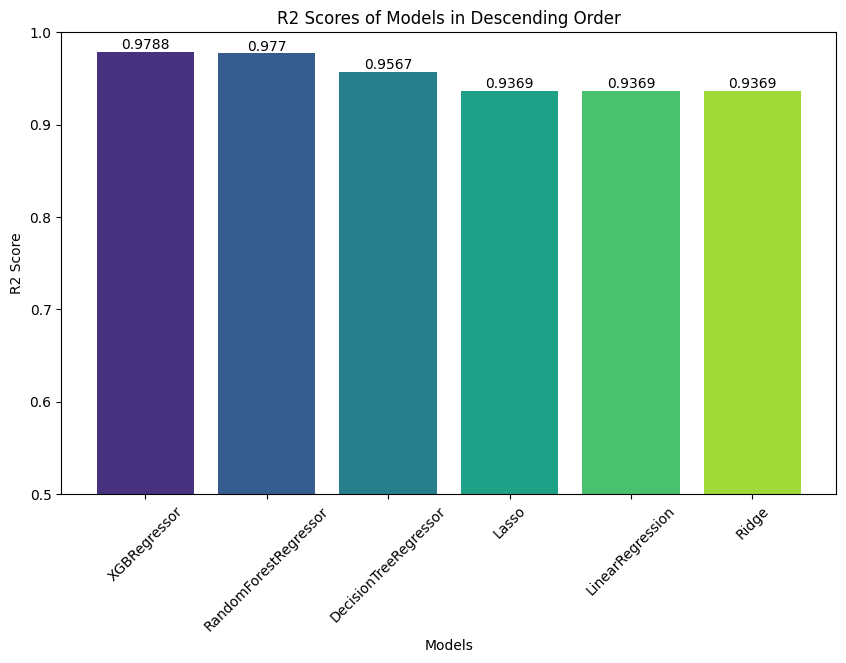

In [30]:
# Example usage of the Library [RegressEasy]
# Ensure that you have defined X_train, y_train, X_test, y_test before calling this function
model_results = reg_modelling(X_train, y_train, X_test, y_test)